In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img_hori'

In [26]:
# imagedatagenerator 이용해서 데이터셋 불러오기

batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=10,
                                  width_shift_range=0.2,
                                  height_shift_range=0.1,
                                  zoom_range=0.1,
                                  shear_range=0.1, 
                                  horizontal_flip=True,
                                  vertical_flip=True
                                  )



train_generator = train_datagen.flow_from_directory(path,
                                                   target_size=(224,224),
                                                   batch_size=batch_size,
                                                   class_mode='categorical') # 학습데이터가 있는 폴더를 가져온다

num_images = train_generator.n
print('Total number of images used for training: ', num_images)

Found 932 images belonging to 2 classes.
Total number of images used for training:  932


In [22]:
# class 이름 호출

class_names = list(train_generator.class_indices.keys())
print(class_names)

['good', 'ng']


In [11]:
# mobilenet_v2 모델 구성
input_shape = (224, 224, 3)
num_classes = 2 #num_classes 변수가 5로 설정되어 있는데, 데이터셋에는 dog와 cat 두 개의 클래스밖에 없는 것으로 보입니다. 따라서 num_classes 변수는 2로 설정해야 합니다.

model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                          classes=num_classes,
                                          weights=None)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [12]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_generator, epochs=30, validation_freq=0.2, callbacks=early_stop)

Epoch 1/30
30/30 [==============================] - ETA: 0s - loss: 0.4670 - accuracy: 0.8766

30/30 [==============================] - 65s 932ms/step - loss: 0.4670 - accuracy: 0.8766
Epoch 2/30
30/30 [==============================] - ETA: 0s - loss: 0.3741 - accuracy: 0.8788

30/30 [==============================] - 13s 443ms/step - loss: 0.3741 - accuracy: 0.8788
Epoch 3/30
30/30 [==============================] - ETA: 0s - loss: 0.2549 - accuracy: 0.9013

30/30 [==============================] - 13s 442ms/step - loss: 0.2549 - accuracy: 0.9013
Epoch 4/30
30/30 [==============================] - ETA: 0s - loss: 0.2413 - accuracy: 0.9185

30/30 [==============================] - 13s 441ms/step - loss: 0.2413 - accuracy: 0.9185
Epoch 5/30
30/30 [==============================] - ETA: 0s - loss: 0.1825 - accuracy: 0.9260

30/30 [==============================] - 13s 442ms/step - loss: 0.1825 - accuracy: 0.9260
Epoch 6/30
30/30 [==============================] - ETA: 0s - loss: 0.1926 - accuracy: 0.9206

30/30 [==============================] - 13s 439ms/step - loss: 0.1926 - accuracy: 0.9206
Epoch 7/30
30/30 [==============================] - ETA: 0s - loss: 0.1505 - accuracy: 0.9378

30/30 [==============================] - 13s 440ms/step - loss: 0.1505 - accuracy: 0.9378
Epoch 8/30
30/30 [==============================] - ETA: 0s - loss: 0.1285 - accuracy: 0.9464

30/30 [==============================] - 13s 438ms/step - loss: 0.1285 - accuracy: 0.9464
Epoch 9/30
30/30 [==============================] - ETA: 0s - loss: 0.1559 - accuracy: 0.9388

30/30 [==============================] - 13s 443ms/step - loss: 0.1559 - accuracy: 0.9388
Epoch 10/30
30/30 [==============================] - ETA: 0s - loss: 0.1485 - accuracy: 0.9442

30/30 [==============================] - 13s 434ms/step - loss: 0.1485 - accuracy: 0.9442
Epoch 11/30
30/30 [==============================] - ETA: 0s - loss: 0.1612 - accuracy: 0.9356

30/30 [==============================] - 13s 443ms/step - loss: 0.1612 - accuracy: 0.9356
Epoch 12/30
30/30 [==============================] - ETA: 0s - loss: 0.1673 - accuracy: 0.9260

30/30 [==============================] - 13s 438ms/step - loss: 0.1673 - accuracy: 0.9260
Epoch 13/30
30/30 [==============================] - ETA: 0s - loss: 0.1821 - accuracy: 0.9367

30/30 [==============================] - 13s 441ms/step - loss: 0.1821 - accuracy: 0.9367
Epoch 14/30
30/30 [==============================] - ETA: 0s - loss: 0.1199 - accuracy: 0.9464

30/30 [==============================] - 13s 444ms/step - loss: 0.1199 - accuracy: 0.9464
Epoch 15/30
30/30 [==============================] - ETA: 0s - loss: 0.1195 - accuracy: 0.9474

30/30 [==============================] - 14s 448ms/step - loss: 0.1195 - accuracy: 0.9474
Epoch 16/30
30/30 [==============================] - ETA: 0s - loss: 0.1115 - accuracy: 0.9506

30/30 [==============================] - 13s 444ms/step - loss: 0.1115 - accuracy: 0.9506
Epoch 17/30
30/30 [==============================] - ETA: 0s - loss: 0.1105 - accuracy: 0.9614

30/30 [==============================] - 13s 439ms/step - loss: 0.1105 - accuracy: 0.9614
Epoch 18/30
30/30 [==============================] - ETA: 0s - loss: 0.1380 - accuracy: 0.9539

30/30 [==============================] - 14s 448ms/step - loss: 0.1380 - accuracy: 0.9539
Epoch 19/30
30/30 [==============================] - ETA: 0s - loss: 0.1014 - accuracy: 0.9592

30/30 [==============================] - 13s 440ms/step - loss: 0.1014 - accuracy: 0.9592
Epoch 20/30
30/30 [==============================] - ETA: 0s - loss: 0.1139 - accuracy: 0.9560

30/30 [==============================] - 13s 445ms/step - loss: 0.1139 - accuracy: 0.9560
Epoch 21/30
30/30 [==============================] - ETA: 0s - loss: 0.1328 - accuracy: 0.9453

30/30 [==============================] - 13s 443ms/step - loss: 0.1328 - accuracy: 0.9453
Epoch 22/30
30/30 [==============================] - ETA: 0s - loss: 0.1183 - accuracy: 0.9549

30/30 [==============================] - 13s 437ms/step - loss: 0.1183 - accuracy: 0.9549
Epoch 23/30
29/30 [============================>.] - ETA: 0s - loss: 0.0908 - accuracy: 0.9623

30/30 [==============================] - 13s 437ms/step - loss: 0.0911 - accuracy: 0.9624
Epoch 24/30
30/30 [==============================] - ETA: 0s - loss: 0.1353 - accuracy: 0.9539

30/30 [==============================] - 13s 436ms/step - loss: 0.1353 - accuracy: 0.9539
Epoch 25/30
30/30 [==============================] - ETA: 0s - loss: 0.0949 - accuracy: 0.9657

30/30 [==============================] - 13s 436ms/step - loss: 0.0949 - accuracy: 0.9657
Epoch 26/30
30/30 [==============================] - ETA: 0s - loss: 0.1185 - accuracy: 0.9549

30/30 [==============================] - 13s 440ms/step - loss: 0.1185 - accuracy: 0.9549
Epoch 27/30
30/30 [==============================] - ETA: 0s - loss: 0.0984 - accuracy: 0.9667

30/30 [==============================] - 13s 437ms/step - loss: 0.0984 - accuracy: 0.9667
Epoch 28/30
30/30 [==============================] - ETA: 0s - loss: 0.0786 - accuracy: 0.9710

30/30 [==============================] - 13s 453ms/step - loss: 0.0786 - accuracy: 0.9710
Epoch 29/30
30/30 [==============================] - ETA: 0s - loss: 0.0692 - accuracy: 0.9785

30/30 [==============================] - 13s 436ms/step - loss: 0.0692 - accuracy: 0.9785
Epoch 30/30
30/30 [==============================] - ETA: 0s - loss: 0.0811 - accuracy: 0.9700

30/30 [==============================] - 14s 444ms/step - loss: 0.0811 - accuracy: 0.9700


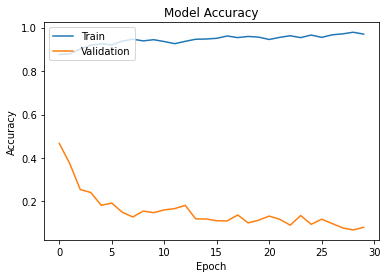

In [18]:
# plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# keras resnet50

In [24]:
# configure the resnet50 model
input_shape = (224, 224, 3)
num_classes = 2
model = tf.keras.applications.ResNet50(input_shape=input_shape,
                                       classes=num_classes,
                                       weights=None)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history1 = model.fit(train_generator, epochs=30, validation_freq=0.2, callbacks=early_stop)

Epoch 1/30
30/30 [==============================] - ETA: 0s - loss: 0.9916 - accuracy: 0.8391

30/30 [==============================] - 53s 502ms/step - loss: 0.9916 - accuracy: 0.8391
Epoch 2/30
30/30 [==============================] - ETA: 0s - loss: 0.4364 - accuracy: 0.8466

30/30 [==============================] - 15s 483ms/step - loss: 0.4364 - accuracy: 0.8466
Epoch 3/30
30/30 [==============================] - ETA: 0s - loss: 0.3624 - accuracy: 0.8852

30/30 [==============================] - 15s 484ms/step - loss: 0.3624 - accuracy: 0.8852
Epoch 4/30
30/30 [==============================] - ETA: 0s - loss: 0.3574 - accuracy: 0.8852

30/30 [==============================] - 15s 494ms/step - loss: 0.3574 - accuracy: 0.8852
Epoch 5/30
30/30 [==============================] - ETA: 0s - loss: 0.3449 - accuracy: 0.8852

30/30 [==============================] - 15s 502ms/step - loss: 0.3449 - accuracy: 0.8852
Epoch 6/30
30/30 [==============================] - ETA: 0s - loss: 0.3819 - accuracy: 0.8702

30/30 [==============================] - 16s 506ms/step - loss: 0.3819 - accuracy: 0.8702
Epoch 7/30
30/30 [==============================] - ETA: 0s - loss: 0.3148 - accuracy: 0.8830

30/30 [==============================] - 14s 472ms/step - loss: 0.3148 - accuracy: 0.8830
Epoch 8/30
30/30 [==============================] - ETA: 0s - loss: 0.3028 - accuracy: 0.8884

30/30 [==============================] - 14s 469ms/step - loss: 0.3028 - accuracy: 0.8884
Epoch 9/30
30/30 [==============================] - ETA: 0s - loss: 0.2960 - accuracy: 0.8970

30/30 [==============================] - 14s 468ms/step - loss: 0.2960 - accuracy: 0.8970
Epoch 10/30
30/30 [==============================] - ETA: 0s - loss: 0.3782 - accuracy: 0.8723

30/30 [==============================] - 14s 470ms/step - loss: 0.3782 - accuracy: 0.8723
Epoch 11/30
30/30 [==============================] - ETA: 0s - loss: 0.3712 - accuracy: 0.8830

30/30 [==============================] - 15s 479ms/step - loss: 0.3712 - accuracy: 0.8830
Epoch 12/30
30/30 [==============================] - ETA: 0s - loss: 0.3478 - accuracy: 0.8852

30/30 [==============================] - 15s 478ms/step - loss: 0.3478 - accuracy: 0.8852
Epoch 13/30
30/30 [==============================] - ETA: 0s - loss: 0.3055 - accuracy: 0.8809

30/30 [==============================] - 15s 512ms/step - loss: 0.3055 - accuracy: 0.8809
Epoch 14/30
30/30 [==============================] - ETA: 0s - loss: 0.2749 - accuracy: 0.8873

30/30 [==============================] - 14s 472ms/step - loss: 0.2749 - accuracy: 0.8873
Epoch 15/30
30/30 [==============================] - ETA: 0s - loss: 0.2808 - accuracy: 0.9013

30/30 [==============================] - 14s 470ms/step - loss: 0.2808 - accuracy: 0.9013
Epoch 16/30
30/30 [==============================] - ETA: 0s - loss: 0.2384 - accuracy: 0.9099

30/30 [==============================] - 14s 461ms/step - loss: 0.2384 - accuracy: 0.9099
Epoch 17/30
30/30 [==============================] - ETA: 0s - loss: 0.2446 - accuracy: 0.9142

30/30 [==============================] - 14s 465ms/step - loss: 0.2446 - accuracy: 0.9142
Epoch 18/30
30/30 [==============================] - ETA: 0s - loss: 0.1617 - accuracy: 0.9324

30/30 [==============================] - 14s 471ms/step - loss: 0.1617 - accuracy: 0.9324
Epoch 19/30
30/30 [==============================] - ETA: 0s - loss: 0.1694 - accuracy: 0.9399

30/30 [==============================] - 15s 482ms/step - loss: 0.1694 - accuracy: 0.9399
Epoch 20/30
30/30 [==============================] - ETA: 0s - loss: 0.1356 - accuracy: 0.9431

30/30 [==============================] - 14s 468ms/step - loss: 0.1356 - accuracy: 0.9431
Epoch 21/30
30/30 [==============================] - ETA: 0s - loss: 0.3987 - accuracy: 0.8766

30/30 [==============================] - 14s 473ms/step - loss: 0.3987 - accuracy: 0.8766
Epoch 22/30
30/30 [==============================] - ETA: 0s - loss: 0.2600 - accuracy: 0.8938

30/30 [==============================] - 15s 474ms/step - loss: 0.2600 - accuracy: 0.8938
Epoch 23/30
30/30 [==============================] - ETA: 0s - loss: 0.1845 - accuracy: 0.9356

30/30 [==============================] - 14s 471ms/step - loss: 0.1845 - accuracy: 0.9356
Epoch 24/30
30/30 [==============================] - ETA: 0s - loss: 0.1413 - accuracy: 0.9399

30/30 [==============================] - 14s 471ms/step - loss: 0.1413 - accuracy: 0.9399
Epoch 25/30
30/30 [==============================] - ETA: 0s - loss: 0.1179 - accuracy: 0.9603

30/30 [==============================] - 14s 473ms/step - loss: 0.1179 - accuracy: 0.9603
Epoch 26/30
30/30 [==============================] - ETA: 0s - loss: 0.0995 - accuracy: 0.9603

30/30 [==============================] - 14s 472ms/step - loss: 0.0995 - accuracy: 0.9603
Epoch 27/30
30/30 [==============================] - ETA: 0s - loss: 0.1392 - accuracy: 0.9442

30/30 [==============================] - 15s 479ms/step - loss: 0.1392 - accuracy: 0.9442
Epoch 28/30
30/30 [==============================] - ETA: 0s - loss: 0.1139 - accuracy: 0.9571

30/30 [==============================] - 15s 476ms/step - loss: 0.1139 - accuracy: 0.9571
Epoch 29/30
30/30 [==============================] - ETA: 0s - loss: 0.0965 - accuracy: 0.9678

30/30 [==============================] - 16s 510ms/step - loss: 0.0965 - accuracy: 0.9678
Epoch 30/30
30/30 [==============================] - ETA: 0s - loss: 0.0944 - accuracy: 0.9635

30/30 [==============================] - 16s 512ms/step - loss: 0.0944 - accuracy: 0.9635


KeyError: ignored

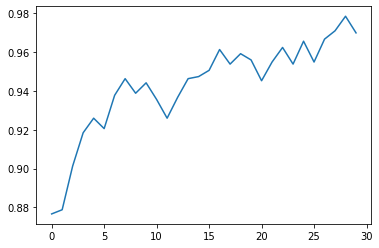

In [27]:
# plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
